# Advertising With Multi Lineer Regression

Bu sayfada Verilen datamızın Multi Lineer Regresssion Kullanarak Birden fazla değikeni göre değişimine bakacağız .
TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacağız.

# Multi Lineer Regression : 
### Çoklu doğrusal regresyon (multilinear regression), bir bağımlı değişkenin (hedef değişken) birden fazla bağımsız değişken (girdiler) kullanılarak tahmin edildiği bir istatistiksel tekniktir.


# Y=β0​ + β1​ X1​ +β2​ X2​ +⋯+β n​ Xn​ +ϵ    Şekilnde Gösterilebilir

### Y: Bağımlı değişken
### X1, X2, ..., Xn: Bağımsız değişkenler
### β0: Y'yi tahmin eden sabit terim (intercept)
### β1, β2, ..., βn: Bağımsız değişkenlerin katsayıları (coefficients)
### ϵ: Hata terimi



#### kısaca birdef fazala parametre vererek y=ax+b nin gelişmiş halini yani burada ax ler artıyor , bağımısz artarken bağımlı tek kalıyor 

In [73]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as npx



In [74]:
df=pd.read_csv('advertising.csv')  # reklam csv dosyası 
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


datamız ın 200 satırı ve 4 stunu var 

-TV
-Radio
-Gazete
-Satış

# EDA

In [75]:
df.shape

(200, 4)

In [76]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [77]:
df.describe().T  #  satır la stünların yerlerini değiştirerek 

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Visualization

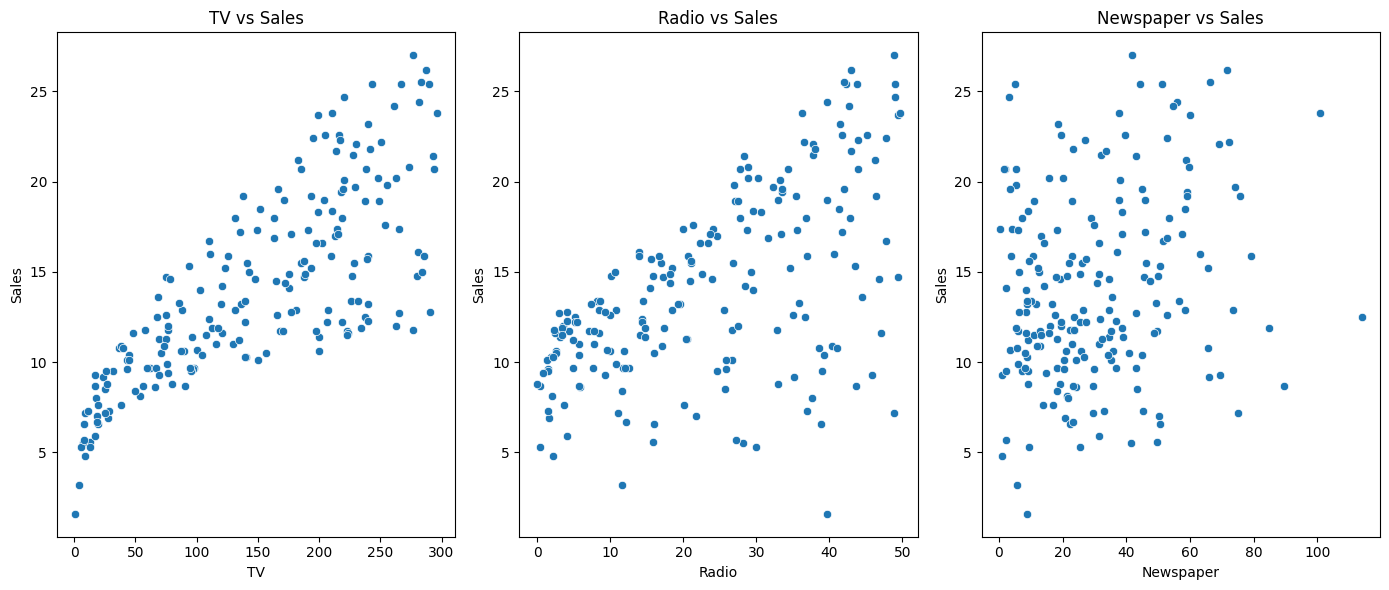

In [78]:
# Scatter plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, ' korelasyon grafiği')

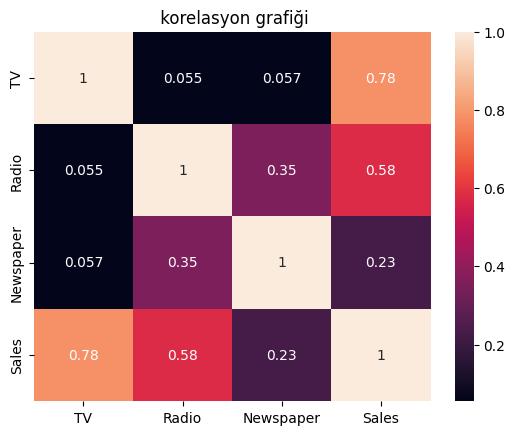

In [79]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title(" korelasyon grafiği")

#  Modeling 

In [80]:
from sklearn.model_selection import train_test_split

x=df.drop("Sales",axis=1)

y=df[['Sales']]

# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)

In [82]:
#  Değerlendirme
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5

print(f"R²: {r2*100}") 
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


R²: 89.9438024100912
MAE: 1.4607567168117606
MSE: 3.1740973539761046
RMSE: 1.7815996615334502


% 89 luk bir başarı oranımız var 

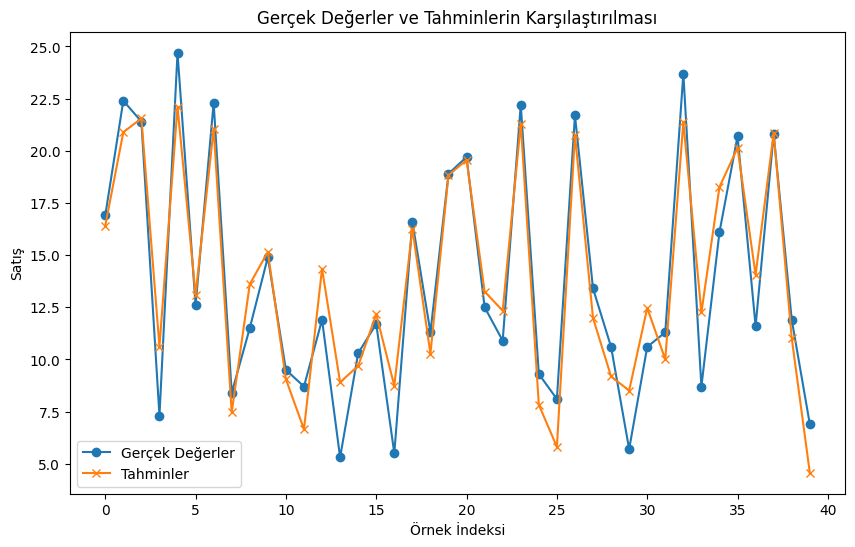

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', marker='o')
plt.plot(predict, label='Tahminler', marker='x')
plt.xlabel('Örnek İndeksi')
plt.ylabel('Satış')
plt.title('Gerçek Değerler ve Tahminlerin Karşılaştırılması')
plt.legend()
plt.show()

# Model.coef_ :
bir regresyon modelinin eğitildikten sonra bağımsız değişkenlere (girdi değişkenlerine) atadığı katsayıları (coefficients) gösterir. Bu katsayılar, her bir bağımsız değişkenin hedef değişken üzerindeki etkisini belirtir.

In [84]:
model.coef_

array([[0.04472952, 0.18919505, 0.00276111]])

In [85]:
katsayi = pd.DataFrame(model.coef_.flatten(), index=x.columns, columns=['Katsayı'])
katsayi = katsayi.sort_values(by='Katsayı', ascending=False)
print("Katsayılar:\n", katsayi)

Katsayılar:
             Katsayı
Radio      0.189195
TV         0.044730
Newspaper  0.002761


#  Sonuç olarak  :
##  Eğere Reklam vericekisek ilk olarak <font color="green"> Radiolardan başlamak gerekiyor , radio yayınlarına verilen fazladan reklam ile iyi bir satış rakamına ulaşabiliriz
## <font color="blue"> sonra ise TV programlarına Reklam verilmeli 
## <font color="red"> en son olarakta Gazetelere reklam verilmesi gerekir 

kısaca : Reklam için ilk önceliğimiz Radiolar olacaktır 

#### ek olarak diğer regresion algortmalari ile değrlendirme 

In [86]:
from regression_function import algo_test 
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.835261e-01,7.210937e-01,6.148378e-01
XGBRegressor,9.724704e-01,9.321655e-01,7.258288e-01
KNeighborsRegressor,9.686090e-01,9.953956e-01,8.447947e-01
Decision Tree,9.462038e-01,1.303073e+00,9.750000e-01
Extra Tree,9.458237e-01,1.307670e+00,8.600000e-01
AdaBoost,9.106204e-01,1.679625e+00,1.189000e+00
Lasso,9.004013e-01,1.773046e+00,1.452202e+00
ElasticNet,8.999612e-01,1.776959e+00,1.456659e+00
Ridge,8.994381e-01,1.781599e+00,1.460766e+00
Linear,8.994380e-01,1.781600e+00,1.460757e+00
